In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000700863"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000700863
SIC,6021
Description,NATIONAL COMMERCIAL BANKS
Name,SUSQUEHANNA BANCSHARES INC
Ticker,SUSQ


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
interest income,28.0,1.469877e+08,3.522274e+07,51364000.0,150996250.0,156991000.0,161976750.0,183859000.0
net income,35.0,2.223294e+07,1.465140e+07,-7777000.0,9580500.0,19024000.0,36236000.0,45648000.0
net interest income,35.0,1.117103e+08,3.254294e+07,26091000.0,99953000.0,106839000.0,138264500.0,155304000.0
provision for loan losses,35.0,1.943417e+07,1.592125e+07,650000.0,5899500.0,15497000.0,31500000.0,55000000.0


# Plots

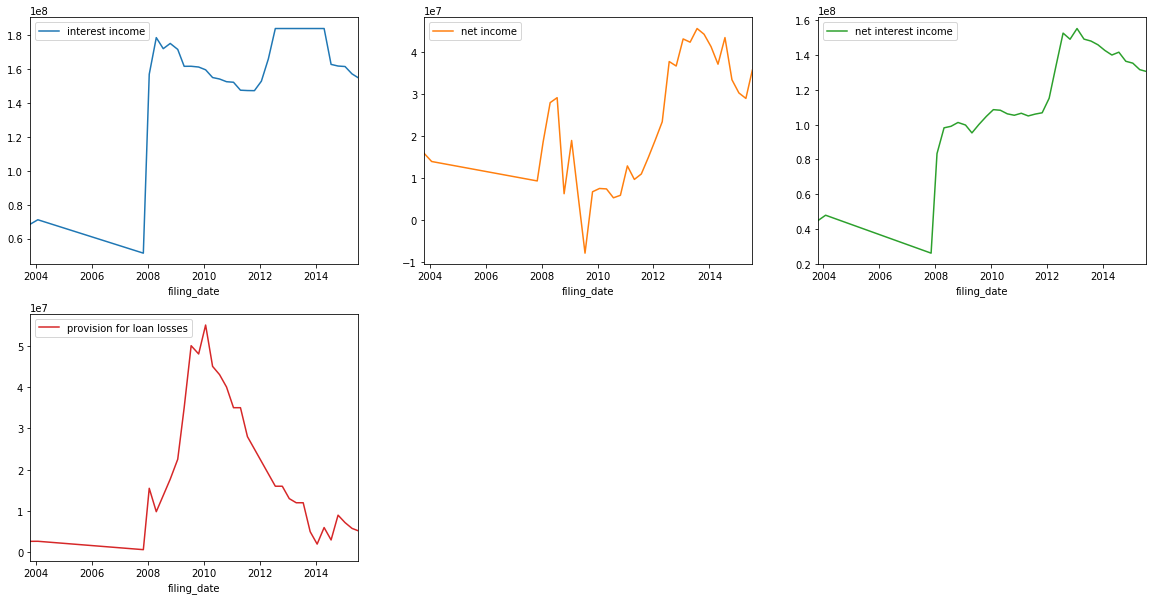

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                               
0000700863 book value per share                               None    empty   
           interest income            2004Q1 to 2006Q3: 11 periods  missing   
           interest income             2007Q1 to 2007Q3: 3 periods  missing   
           interest income             2012Q3 to 2014Q1: 7 periods  missing   
           net income                 2004Q1 to 2006Q3: 11 periods  missing   
           net income                  2007Q1 to 2007Q3: 3 periods  missing   
           net interest income        2004Q1 to 2006Q3: 11 periods  missing   
           net interest income         2007Q1 to 2007Q3: 3 periods  missing   
           provision for loan losses  2004Q1 to 2006Q3: 11 periods  missing   
           provision for loan losses   2007Q1 to 2007Q3: 3 periods  missing   
           total revenue                                      None    empty   

                                                 message  
cik        item                                           
0000700863 book value per share       No values for item  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()